# 自然語言處理 HW1 
# 組員 : 110590450 歐佳昀 110590452 莊于潔
110590450 歐佳昀(70%) : 作業架構、流程、分析、改善

110590452 莊于潔(30%) : 作業模型挑選、參數調整

## due 4/29,2024

- Goal: Deriving word embeddings for estimating word similarity and analogy prediction on open datasets

- Input: 
    - Word embeddings: fine-tuning pretrained models, or trained on your own 
    - Text dataset

- Output: Result of word similarity and analogy prediction

### Tasks

- Deriving word embeddings for estimating word similarity and analogy prediction on open data (as detailed in the following slides)

    - (40pt) (1) Deriving a word embedding model,Either fine-tuning a pretrained model Or training a new model
    - (30pt) (2) Using word embedding for word similarity estimation
    - (30pt) (3) Using word embedding for analogy prediction
    - [Optional]:
         - (25pt) (4) Compare with other document similarity estimation methods,For example, co-occurrence matrix with TF-IDF, SVD, …
        - (25pt) (5) Apply word embeddings in other tasks,For example, classification, NER, …

### Data: 
- [WordSimilarity-353 Corpus] by Evgeniy Gabrilovich Available at: https://gabrilovich.com/resources/data/wordsim353/wordsim353.html Two sets of word pairs with their similarity scores

- [Bigger Analogy Test Set (BATS)] by Vecto team Available at: http://vecto.space/projects/BATS/  98,000 questions in 40 morphological and semantic categories

以上資料集請放置於data/

### File tree
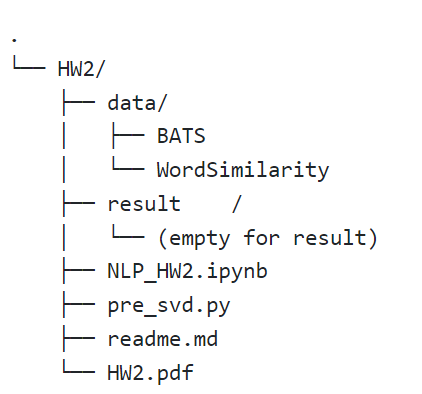
### ref:
 - https://zhuanlan.zhihu.com/p/57765947



### Output format: 

#### Task 1 : 

word embeding :
 - wrod2vec
 - https://github.com/mmihaltz/word2vec-GoogleNews-vectors/blob/master/README.md
 - https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

 - GLoVe
 - https://github.com/stanfordnlp/GloVe
 - https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip

 - SVD
 - https://github.com/valentinp72/svd2vec
 - ```
    wget http://mattmahoney.net/dc/text8.zip -O text8.gz
    gzip -d text8.gz -f
   ```
#### Task 2 : 

 - (1)

    model name : word2vec
    
    diff_abs 平均值： 1.3917418687971976
    
    SignificanceResult(statistic=0.6845969668422078, pvalue=1.016190193647808e-49)
   
   => 強相關

 - (2)
 
    model name : GLoVe

    diff_abs 平均值： 1.4636849824143916
    
    SignificanceResult(statistic=0.5987723194963509, pvalue=1.0213953289911825e-35)
    
    => 中等強相關(近強相關)

#### Task 3 :

(節選 1-3表現最好者)

 - (1)

   model name : GLoVe

   data/BATS\1_Inflectional_morphology: category  [noun - plural_reg]\
   total accuracy  -  total: 35 ps: 35 lm: 35 data: 50\
   total: 0.7\
   Stemming: 0.7\
   Lemmatization: 0.7

   data/BATS\1_Inflectional_morphology: category  [verb_ving - ved]\
   total accuracy  -  total: 38 ps: 41 lm: 38 data: 50\
   total: 0.76\
   Stemming: 0.82\
   Lemmatization: 0.76

   data/BATS\3_Encyclopedic_semantics: category  [country - capital]\
   total accuracy  -  total: 46 ps: 43 lm: 46 data: 50\
   total: 0.92\
   Stemming: 0.86\
   Lemmatization: 0.92


 - (2)

   model name : word2vec

   data/BATS\1_Inflectional_morphology: category  [noun - plural_reg]\
   total accuracy  -  total: 32 ps: 35 lm: 32 data: 50\
   total: 0.64\
   Stemming: 0.7\
   Lemmatization: 0.64\

   data/BATS\1_Inflectional_morphology: category  [verb_ving - ved]\
   total accuracy  -  total: 38 ps: 43 lm: 38 data: 50\
   total: 0.76\
   Stemming: 0.86\
   Lemmatization: 0.76

   data/BATS\1_Inflectional_morphology: category  [verb_3psg - ved]\
   total accuracy  -  total: 27 ps: 30 lm: 27 data: 50\
   total: 0.54\
   Stemming: 0.6\
   Lemmatization: 0.54

 - (3)

   model name : SVD - word2vec

   data/BATS\1_Inflectional_morphology: category  [noun - plural_reg]\
   total accuracy  -  total: 11 ps: 11 lm: 11 data: 50\
   total: 0.22\
   Stemming: 0.22\
   Lemmatization: 0.22

   data/BATS\1_Inflectional_morphology: category  [noun - plural_irreg]\
   total accuracy  -  total: 7 ps: 7 lm: 0 data: 50\
   total: 0.14\
   Stemming: 0.14\
   Lemmatization: 0.0

   data/BATS\1_Inflectional_morphology: category  [verb_inf - 3psg]\
   total accuracy  -  total: 3 ps: 7 lm: 3 data: 50\
   total: 0.06\
   Stemming: 0.14\
   Lemmatization: 0.06

---


#### Task  - 2
 
##### Using word embedding for word similarity estimation

其中
SignificanceResult(statistic, pvalue)

statistic 表 : 

0.8-1.0：極強相關

0.6-0.8：強相關

0.4-0.6：中等強度相關

0.2-0.4：弱相關

0.0-0.2：極弱或者無相關

引入套件

In [1]:
from gensim.models import KeyedVectors
import pandas as pd
import gensim
import gensim.downloader as api
from scipy.stats import spearmanr as sp
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

載入dataset (Word353) 

In [2]:
Word353 = pd.read_csv("data/WordSimilarity/combined.csv")

將詞前處理

In [3]:
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()# 效果不好

lm = WordNetLemmatizer()

def process_word(x):
    if isinstance(x, str):
        x = x.lower()
        # x = ps.stem(x)
        x = lm.lemmatize(x)
    return x

Word353 = Word353.applymap(process_word)


以word2vec對每行的兩個word預測相似度

In [4]:
def extract_words(row,model):
    if row['Word 1'] in model.key_to_index and row['Word 2']  in model.key_to_index:

        return  (model.similarity(row['Word 1'], row['Word 2'])+1)*5 
    
    else:
        return -5

def extract_words_origin(row,model):
    if row['Word 1'] in model.key_to_index and row['Word 2']  in model.key_to_index:

        return  (model.similarity(row['Word 1'], row['Word 2'])) 
    else:
        
        return -5
   

計算與人類 Human (mean)的差異

In [5]:
def calculate_difference(row):
    return abs(row['model_score'] - row['Human (mean)'])


引入pre-train model

(https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g)

(需下載至本地，創建/model資料夾)

In [6]:
model_word2vec = KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [9]:
df = Word353.apply(extract_words,model=model_word2vec, axis=1)

merge_df = pd.concat([df, Word353], axis=1)
merge_df = merge_df.rename(columns={0: 'model_score'})

df = Word353.apply(extract_words_origin,model=model_word2vec, axis=1)
merge_df = pd.concat([df, merge_df], axis=1)
merge_df = merge_df.rename(columns={0: 'origin_score'})


merge_df = merge_df.drop(merge_df[merge_df['origin_score'] == -5].index)
merge_df.reset_index(drop=True, inplace=True)

merge_df['diff_abs'] = merge_df.apply(calculate_difference, axis=1)

print(merge_df)
diff_abs_mean = merge_df['diff_abs'].mean()
print("model name : word2vec")
print("diff_abs 平均值：", diff_abs_mean)
print(sp(merge_df['origin_score'],merge_df['Human (mean)']))


     origin_score  model_score        Word 1    Word 2  Human (mean)  \
0        0.263938     6.319689          love       sex          6.77   
1        0.517296     7.586481         tiger       cat          7.35   
2        1.000000    10.000000         tiger     tiger         10.00   
3        0.363463     6.817313          book     paper          7.46   
4        0.396392     6.981958      computer  keyboard          7.62   
..            ...          ...           ...       ...           ...   
345      0.129479     5.647397        shower     flood          6.03   
346      0.362721     6.813604       weather  forecast          8.34   
347      0.145228     5.726142      disaster      area          6.25   
348      0.296636     6.483178      governor    office          6.34   
349      0.143093     5.715467  architecture   century          3.78   

         diff_abs  
0    4.503114e-01  
1    2.364810e-01  
2    2.980232e-07  
3    6.426870e-01  
4    6.380418e-01  
..            .

做成csv

In [15]:

merge_df.to_csv("result/word2vec_353_wor2vec.csv")

使用 GLoVe

pre-train model : 
(https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip)

解壓縮後，載入的是glove.6B.300d.txt，需創建/model，並放入該目錄底下

In [12]:
model_glove = gensim.models.KeyedVectors.load_word2vec_format('model/glove.6B.300d.txt', no_header = True)

In [13]:
Word353 = Word353.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [14]:
df = Word353.apply(extract_words,model=model_glove, axis=1)

merge_df = pd.concat([df, Word353], axis=1)
merge_df = merge_df.rename(columns={0: 'model_score'})

df = Word353.apply(extract_words_origin,model=model_glove, axis=1)
merge_df = pd.concat([df, merge_df], axis=1)
merge_df = merge_df.rename(columns={0: 'origin_score'})


merge_df = merge_df.drop(merge_df[merge_df['origin_score'] == -5].index)
merge_df.reset_index(drop=True, inplace=True)

merge_df['diff_abs'] = merge_df.apply(calculate_difference, axis=1)

print(merge_df)
diff_abs_mean = merge_df['diff_abs'].mean()
print("model name : GLoVe")
print("diff_abs 平均值：", diff_abs_mean)
print(sp(merge_df['origin_score'],merge_df['Human (mean)']))


     origin_score  model_score        Word 1    Word 2  Human (mean)  diff_abs
0        0.428830     7.144149          love       sex          6.77  0.374149
1        0.312891     6.564454         tiger       cat          7.35  0.785546
2        1.000000    10.000000         tiger     tiger         10.00  0.000000
3        0.454216     7.271080          book     paper          7.46  0.188920
4        0.441461     7.207306      computer  keyboard          7.62  0.412694
..            ...          ...           ...       ...           ...       ...
348      0.072899     5.364494        shower     flood          6.03  0.665506
349      0.496258     7.481290       weather  forecast          8.34  0.858710
350      0.261253     6.306264      disaster      area          6.25  0.056264
351      0.404522     7.022609      governor    office          6.34  0.682609
352      0.420720     7.103602  architecture   century          3.78  3.323602

[353 rows x 6 columns]
model name : GLoVe
diff_abs 

做成csv

In [16]:

merge_df.to_csv("result/glove_353.csv")

--- 

#### Task  - 3 

with [optional]
 
##### Using word embedding for word similarity estimation


載入套件

In [81]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim
from gensim.models import KeyedVectors
import pandas as pd
from scipy.stats import spearmanr as sp
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
import nltk
import re
import os

載入PorterStemmer、WordNetLemmatizer模型做詞性還原

In [82]:
#stemmer
ps=PorterStemmer()
#Lemmatizer
lm = WordNetLemmatizer()

遍歷各群，進行計算

In [83]:

def list_files_and_folders(directory):
    
    arr = []
    dic = []
    for item in os.listdir(directory):
        # 獲取完整的路径
        item_path = os.path.join(directory, item)
        dic.append(item_path)
        _arr = []
        for  i in  os.listdir(item_path):
            _arr.append(i)
        arr.append(_arr)
        # print(arr)
    return arr,dic

word pre-process

(全替換小寫)

In [84]:
def extract_words(word_txt):
    matches = re.findall(r'\[(.*?)\]', word_txt)
    parts = []
    for match in matches:
        if "+" in match:
            parts = match.split('+')
        else:
            parts = match.split(' - ')
    word1 = parts[0].lower()
    word2 = parts[1].lower()
    return word1, word2

更新group 詞類(更換不存在的類名)

In [85]:

def glove_process_words(word1, word2):
    
    if word1 == "verb_inf":
        word1 = "verb"
        
    if word1 == "verb_ving":
        word1 = "ving"
        
    if word1 == "adj":
        word1 = "adjectives"
        
    if word2 == "comparative":
        word2 = "er"
        
    if word1 == "verb_3psg":
        word1 = "verbs"
        
    if word1 == "un":
        word1 = "prefix"
    
    if word2 == "3psg":
        word2 = "verbs"
    
    if word2 == "less_reg" :
        word2 = "less"
        
    if word2 == "ly_reg" :
        word2 = "adverb"
        
    if word2 == "adj_reg" :
        word2 = "adjectives"
    
    if word2 == "verb_reg" :
        word2 = "verb_reg"
    
    if word2 == "ness_reg" :
        word2 = "ness"
    
    if word2 == "able_reg" :
        word2 = "able"
    
    if word2 == "er_irreg" :
        word2 = "er"
        
    if word2 == "tion_irreg" :
        word2 = "tion"
        
    if word2 == "ment_irreg" :
        word2 = "ment"
        
    if word2 == "verb_reg" :
        word2 = "verb"
        
    if word2 == "plural_reg" or word2 == "plural_irreg" :
        word2 = "plural"
        
    return word1, word2

詞類預測(兩種不同情況)

In [117]:
def calculate_similarity(row, word1, word2, ps_total_true, lm_total_true, total_true,model):
    guss_group = []
    if row[word1] in model.key_to_index and word1 in model.key_to_index and word2 in model.key_to_index:
        guss_group_cab = model.most_similar(positive=[row[word1],word1], negative=[word2], topn=1)[0][0]
        
        # guss_group = model_glove.most_similar(positive=["ankara","country"], negative=["capital"], topn=5)
        # ca b guss_group
        
        # a:b :: c : guss_group
        
        # 男人:女人::國王:??
        # most_similar (正= [ '女人' ,  '國王' ], 負= [ '男人' ])
        # ba c 
        guss_group_bca = model.most_similar(positive=[ word2,row[word1]], negative=[word1], topn=1)[0][0]
        
        if ps.stem(guss_group_cab) in row[word2] or ps.stem(guss_group_bca) in row[word2]:
            ps_total_true += 1
        if lm.lemmatize(guss_group_cab) in row[word2] or lm.lemmatize(guss_group_bca) in row[word2]:
            lm_total_true += 1
        if guss_group_cab in row[word2] or guss_group_bca in row[word2]:
            total_true += 1
        guss_group.append([guss_group_cab,guss_group_bca])
    return guss_group,ps_total_true, lm_total_true, total_true

輸出format(正確率計算)

In [99]:
def printf_results(word_pred, k, word1, word2, dic, ps_total_true, lm_total_true, total_true, total_data, f,model_name):
   
    # word_pred.to_csv("result_"+model_name+"/category" + str(k + 1) + "/" + word1 + "-" + word2 + ".csv")
    # print(dic[k], ": ", "category  [", word1 + " - " + word2 + " ]")
    # print("total accuracy  ", "total : ", total_true, "ps : ", ps_total_true, "lm : ", lm_total_true,"data : ",total_data)
    # print(f'total :{(total_true ) / total_data}')
    # print(f'Stemming  :{(ps_total_true) / total_data}')
    # print(f'lemmatization  : {(lm_total_true) / total_data}')
    # print()
    
    f.write(dic[k] + ": category  [" + word1 + " - " + word2 + "]\n")
    f.write("total accuracy  - " +" total: " + str(total_true) +" ps: "+str(ps_total_true) + " lm: " + str(lm_total_true) + " data: " + str(total_data) + "\n")
    f.write(f'total: {(total_true)/ total_data}\n')
    f.write(f'Stemming: {(ps_total_true)/ total_data}\n')
    f.write(f'Lemmatization: {(lm_total_true) / total_data}\n\n')

載入預訓練模型

In [88]:
model_glove = gensim.models.KeyedVectors.load_word2vec_format('model/glove.6B.300d.txt', no_header = True)

進行預測

In [118]:

directory_path = "data/BATS"
arr,dic = list_files_and_folders(directory_path)


with open("result/all_result_glove.txt", "w") as f:
    k = 0
    for i in arr:
        for word_txt in i:
            
            other = ''
            
            word1, word2 = extract_words(word_txt)
            
            word1_name = word1
            word2_name = word2
            
            print(word1,word2,word1_name,word2_name)
            
            word1, word2 = glove_process_words(word1, word2)
            
            word = pd.read_csv(dic[k]+"/"+word_txt,sep="\t", names=[word1,word2], header=None)
            
            ps_total_true =0 
            lm_total_true =0 
            total_true =0 
            total_data = 0
            
            def category_most_similar(row) :
                global ps_total_true,lm_total_true,total_true,total_data
                total_data +=1

                guss_group,ps_total_true, lm_total_true, total_true = calculate_similarity(row, word1, word2, ps_total_true, lm_total_true, total_true,model_glove)
                return guss_group

            word_category = word.apply(category_most_similar,axis=1)

            word_pred = pd.concat([word, word_category], axis=1)
            word_pred = word_pred.rename(columns={0:"pred"})
            
            if(total_true != 0 or ps_total_true != 0 or lm_total_true != 0 ):
                printf_results(word_pred, k, word1_name, word2_name, dic, ps_total_true, lm_total_true, total_true, total_data, f,"glove")


        k+=1
        
f.close()


noun plural_reg noun plural_reg


data/BATS\1_Inflectional_morphology :  category  [ noun - plural_reg ]
total accuracy   total :  35 ps :  35 lm :  35 data :  50
total :0.7
Stemming  :0.7
lemmatization  : 0.7

noun plural_irreg noun plural_irreg
data/BATS\1_Inflectional_morphology :  category  [ noun - plural_irreg ]
total accuracy   total :  29 ps :  33 lm :  5 data :  50
total :0.58
Stemming  :0.66
lemmatization  : 0.1

adj comparative adj comparative
data/BATS\1_Inflectional_morphology :  category  [ adj - comparative ]
total accuracy   total :  6 ps :  6 lm :  6 data :  50
total :0.12
Stemming  :0.12
lemmatization  : 0.12

adj superlative adj superlative
data/BATS\1_Inflectional_morphology :  category  [ adj - superlative ]
total accuracy   total :  1 ps :  1 lm :  1 data :  50
total :0.02
Stemming  :0.02
lemmatization  : 0.02

verb_inf 3psg verb_inf 3psg
data/BATS\1_Inflectional_morphology :  category  [ verb_inf - 3psg ]
total accuracy   total :  16 ps :  45 lm :  16 data :  50
total :0.32
Stemming  :0.9
lemmati

載入word2vec模型

In [90]:
model_word2vec = KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin.gz', binary=True)

進行預測等

In [119]:

directory_path = "data/BATS"
arr,dic = list_files_and_folders(directory_path)


with open("result/all_result_word2vec.txt", "w") as f:
    k = 0
    for i in arr:
        for word_txt in i:
            
            word1, word2 = extract_words(word_txt)
            
            word1_name = word1
            word2_name = word2
            
            word1, word2 = glove_process_words(word1, word2)
                        
            word = pd.read_csv(dic[k]+"/"+word_txt,sep="\t", names=[word1,word2], header=None)
            
            ps_total_true =0 
            lm_total_true =0 
            total_true =0 
            total_data = 0
            
            def category_most_similar(row) :
                global ps_total_true,lm_total_true,total_true,total_data
                total_data +=1

                guss_group,ps_total_true, lm_total_true, total_true = calculate_similarity(row, word1, word2, ps_total_true, lm_total_true, total_true,model_word2vec)
                return guss_group

            word_category = word.apply(category_most_similar,axis=1)

            word_pred = pd.concat([word, word_category], axis=1)
            word_pred = word_pred.rename(columns={0:"pred"})
            
            if(total_true != 0 or ps_total_true != 0 or lm_total_true != 0 ):
                printf_results(word_pred, k, word1_name, word2_name, dic, ps_total_true, lm_total_true, total_true, total_data, f,"word2vec")


        k+=1
        
f.close()




data/BATS\1_Inflectional_morphology :  category  [ noun - plural_reg ]
total accuracy   total :  32 ps :  35 lm :  32 data :  50
total :0.64
Stemming  :0.7
lemmatization  : 0.64

data/BATS\1_Inflectional_morphology :  category  [ noun - plural_irreg ]
total accuracy   total :  22 ps :  33 lm :  4 data :  50
total :0.44
Stemming  :0.66
lemmatization  : 0.08

data/BATS\1_Inflectional_morphology :  category  [ adj - comparative ]
total accuracy   total :  11 ps :  13 lm :  11 data :  50
total :0.22
Stemming  :0.26
lemmatization  : 0.22

data/BATS\1_Inflectional_morphology :  category  [ adj - superlative ]
total accuracy   total :  1 ps :  3 lm :  1 data :  50
total :0.02
Stemming  :0.06
lemmatization  : 0.02

data/BATS\1_Inflectional_morphology :  category  [ verb_inf - 3psg ]
total accuracy   total :  12 ps :  38 lm :  12 data :  50
total :0.24
Stemming  :0.76
lemmatization  : 0.24

data/BATS\1_Inflectional_morphology :  category  [ verb_inf - ving ]
total accuracy   total :  26 ps :  3

載入SVD (自訓練 - SVD-wor2vec )

自訓練

```
python pre_svd.py

```

In [92]:
model_svd = KeyedVectors.load_word2vec_format("svd_word2vec_format.txt")

進行預測等

In [120]:

directory_path = "data/BATS"
arr,dic = list_files_and_folders(directory_path)


with open("result/all_result_svd.txt", "w") as f:
    k = 0
    for i in arr:
        for word_txt in i:
            
            word1, word2 = extract_words(word_txt)
            
            word1_name = word1
            word2_name = word2
            
            word1, word2 = glove_process_words(word1, word2)
                        
            word = pd.read_csv(dic[k]+"/"+word_txt,sep="\t", names=[word1,word2], header=None)
            
            ps_total_true =0 
            lm_total_true =0 
            total_true =0 
            total_data = 0
            
            def category_most_similar(row) :
                global ps_total_true,lm_total_true,total_true,total_data
                total_data +=1

                guss_group,ps_total_true, lm_total_true, total_true = calculate_similarity(row, word1, word2, ps_total_true, lm_total_true, total_true,model_svd)
                return guss_group

            word_category = word.apply(category_most_similar,axis=1)

            word_pred = pd.concat([word, word_category], axis=1)
            word_pred = word_pred.rename(columns={0:"pred"})
            
            if(total_true != 0 or ps_total_true != 0 or lm_total_true != 0 ):
                printf_results(word_pred, k, word1_name, word2_name, dic, ps_total_true, lm_total_true, total_true, total_data, f,"svd")


        k+=1
        
f.close()




data/BATS\1_Inflectional_morphology :  category  [ noun - plural_reg ]
total accuracy   total :  11 ps :  11 lm :  11 data :  50
total :0.22
Stemming  :0.22
lemmatization  : 0.22

data/BATS\1_Inflectional_morphology :  category  [ noun - plural_irreg ]
total accuracy   total :  7 ps :  7 lm :  0 data :  50
total :0.14
Stemming  :0.14
lemmatization  : 0.0

data/BATS\1_Inflectional_morphology :  category  [ verb_inf - 3psg ]
total accuracy   total :  3 ps :  7 lm :  3 data :  50
total :0.06
Stemming  :0.14
lemmatization  : 0.06

data/BATS\2_Derivational_morphology :  category  [ noun - less_reg ]
total accuracy   total :  0 ps :  1 lm :  1 data :  50
total :0.0
Stemming  :0.02
lemmatization  : 0.02

data/BATS\2_Derivational_morphology :  category  [ un - adj_reg ]
total accuracy   total :  3 ps :  4 lm :  3 data :  50
total :0.06
Stemming  :0.08
lemmatization  : 0.06

data/BATS\2_Derivational_morphology :  category  [ over - adj_reg ]
total accuracy   total :  2 ps :  3 lm :  2 data :  5